<Body>   
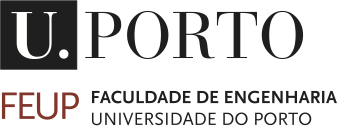   
<h1> <b>Machine Learning 2022/2023 </b> </h1>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---


$\color{yellow}{Name\text{ }Student\text{ }1:}$ Felipe Coelho Moreira Ribeiro Coutinho

$\color{yellow}{Name\text{ }Student\text{ }2:}$ Rita Isabel Ferreira Duarte

# Assignment 1

## Exercise 1 (Paper and pencil exercise)

Consider the linear regression problem (with loss function $J(\boldsymbol{\theta}) = \|Y-X\boldsymbol{\theta}\|^2$) for the following data set:
\begin{array}{|c|c|c|c|}
	%$\boldsymbol{x}_1$ 
	x_1 & x_2 & y \\
	\hline
	\pi/4 &\pi/4 &2 \\
	-\pi/3 &\pi/3 &-2 \\
	\pi/8 &\pi/8 &1 
\end{array}

with the model $y = f_{\boldsymbol{\theta}}(x)$, where  $f_{\boldsymbol{\theta}}(x) = \theta_0 + \theta_1 x_1 + \theta_2 \sin(x_1+x_2) + \theta_3 \cos (x_1+x_2)$. 

a) Obtain the expression for the gradient $\nabla J(\boldsymbol{\theta})$ as a function  of the vector of labels $Y$ and the related matrix of features $X$. Obtain explicitly $X$ and $Y$. 
	



$\color{green}{Solution\text{ } 1a)}$  **(Paste a digitalized image of your solution below)**





![image.png](https://github.com/rita0435/Aprendizagem_Computacional_TPC/blob/main/TPC_1_a.jpg?raw=true)

b) Say if the following statement is true or false, justifying your response. "The previous linear regression problem has a closed-form solution and the minimization of the loss function has led to an unique solution".

$\color{green}{Solution\text{ } 1b)}$ **(Present your justification here)**

The linear regression has a clsoed-form solution, in the sense that we can compute the minimization of the loss function analitically, leading to the expression:
$$
\hat{y} = (X^TX)^{-1}X^T y
$$
However, we can't assert that the solution is unique, since the above equation is only valid if $X^T X$ happens to be invertible - which is not guaranteed. If it is not invertible, then we are left with a system of equations of the form:
$$
X^T X \hat{y} = X^T y
$$
In fact, the code below shows that this is the case. We can either use a numerical computation of $X^T X$ eigenvalues to check that one of them is zero (up to machine precision), or use the computational algebra package `sympy` to calculate them (or the determinant) analitically.

In [1]:
import numpy as np
A = np.array([[np.pi/4, np.pi/4, 1, 0],
              [-np.pi/3, np.pi/4, 0, 1],
              [np.pi/8, np.pi/8, 1/np.sqrt(2), 1/np.sqrt(2)]])

In [2]:
B = A.T @ A

eig = np.linalg.eigvals(B)
print(eig)

[2.78343377e+00 3.25422214e+00 3.16372604e-17 2.17942766e-01]


In [3]:
import sympy as sp
from IPython.display import display
A = sp.Matrix([[sp.pi/4, sp.pi/4, 1, 0],
              [-sp.pi/3, sp.pi/4, 0, 1],
              [sp.pi/8, sp.pi/8, 1/sp.sqrt(2), 1/sp.sqrt(2)]])
display(A)
B = sp.transpose(A) * A
B.det()

ModuleNotFoundError: No module named 'sympy'

## Exercise 2 (Python exercise)

Consider the following data for a linear regression problem where $x_i$ is the feature $i^{th}$ and y is the output:


\begin{array}{llll}
		\hline \hline
		x_1  & x_2 & x_3 & y \\
		\hline \hline
		340    & 16    & 356   & 1.5        \\
		665    & 25    & 690   & 2.8        \\
		368    & 15    & 383   & 1.7        \\
		331    & 15    & 346   & 1.3      \\
		954    & 40    & 994   & 5.0        \\
		\hline
\end{array}
	


Calculate the solutions for the following regression models. If the solution is not unique, please provide a better approach. **Note: do not use the sklearn library**. 

a) $\hat{y} = \theta_1 x_1 + \theta_2 x_2$.

The eigenvalues are:  [1.71584495e+06 1.20535402e+01]
Mean squared error:  0.08138618961816368


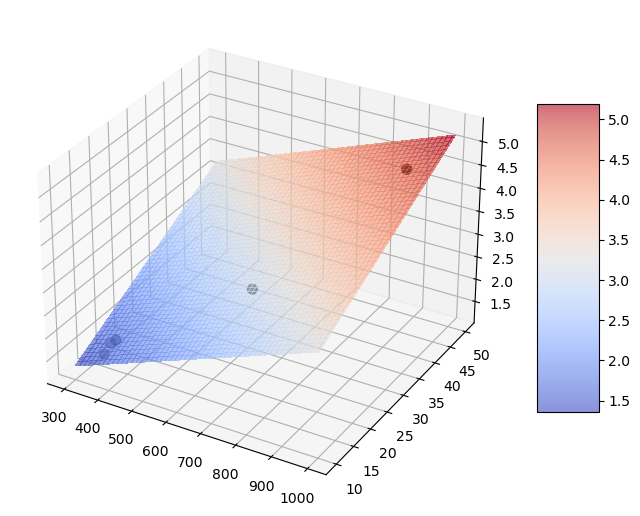

In [8]:
# Solution a)
### Note that the linear regression model proposed do not include the bias term
### Therefore, we will not perform the pre-processing step to append the unit feature

### Imports
import numpy as np
import matplotlib.pyplot as plt

### Inputs:

x_1 = np.array([340, 665, 368, 331, 954])
x_2 = np.array([16, 25, 15, 15, 40])

y = np.array([1.5, 2.8, 1.7, 1.3, 5.])

x = np.array([x_1, x_2]).T

### Verify if solution is unique

# if x.T @ x is invertible, then the solution is unique
# one way to verify if the matrix is invertible is by checking it's eigenvalues (see if none of them is equal to zero)
# there are other ways to check this property such as checking the determinant is different than zero
# since we checked the first way in the pratical classes, we proceded to do it that way

print('The eigenvalues are: ', np.linalg.eig(np.dot(x.T, x))[0])

### Since the solution is unique, we'll continue the exercise and find the thetas for the regression

### Inverse matrix

xT_x_inv = np.linalg.inv(np.dot(x.T, x))

### Regression

theta = np.dot( np.dot(xT_x_inv, x.T), y)

y_regression = np.dot(theta, x.T)

### Mean squared error

mse = np.sum( (y_regression - y )**2 )/ len(y)

print('Mean squared error: ', mse)
####################################################################################
### Visualization 

N = 100
x1_grid = np.linspace(300, 1000, N)
x2_grid = np.linspace(10, 50, N)
YY = np.zeros((N, N))
for i, x1 in enumerate(x1_grid):
    for j, x2 in enumerate(x2_grid):
        input = np.array([x1, x2])
        YY[i, j] = np.dot(theta, input.T)
XX1, XX2 = np.meshgrid(x1_grid, x2_grid)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

# Initialize plots
surf = ax.plot_surface(XX1, XX2, YY, cmap="coolwarm", alpha=0.6,
                        linewidth=0, antialiased=False, label="regression", zorder=0)
scatter = ax.scatter(x_1, x_2, y, color="k", s=50, label="data", zorder=1)
# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5, ax=ax)

b) $\hat{y} = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$

The eigenvalues are:  [3.57311664e+06 8.98303654e-11 1.73646775e+01]
The eigenvalues are:  [3.57311714e+06 5.00000000e-01 1.78646775e+01]
Mean squared error:  0.08139024007399365
Skips: 0


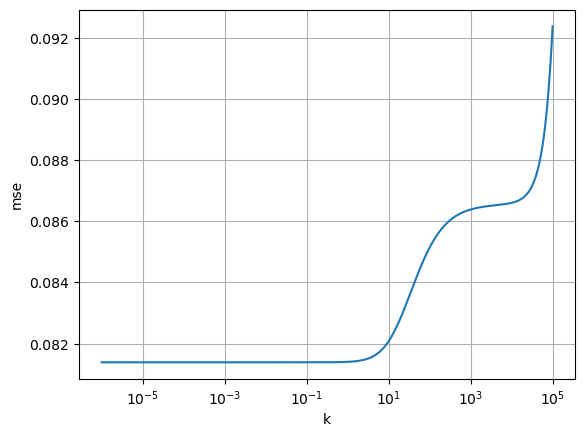

In [9]:
# Solution b)

### Inputs

x_1 = np.array([340, 665, 368, 331, 954])
x_2 = np.array([16, 25, 15, 15, 40])
x_3 = np.array([356, 690, 383, 346, 994])

y = np.array([1.5, 2.8, 1.7, 1.3, 5.])

x = np.array([x_1, x_2, x_3]).T

### Verify if solution is unique

print('The eigenvalues are: ', np.linalg.eig(np.dot(x.T, x))[0])

# Since one of the eigenvalues is approximatly 0, we'll try to use Ridge regression
# Note that since x3 = x1 + x2, i.e a linear combination, it doesn't contain new information
# and we should expect this to happen

k = 0.5

print('The eigenvalues are: ', np.linalg.eig(np.dot(x.T, x) + k*np.eye(len(x[0])) )[0])

### Inverse matrix

xT_x_inv = np.linalg.inv(np.dot(x.T, x) + k*np.eye(len(x[0])))

### Regression

theta = np.dot( np.dot(xT_x_inv, x.T), y)

y_regression = np.dot(theta, x.T)

### Mean squared error

mse = np.sum( (y_regression - y )**2 )/ len(y)

print('Mean squared error: ', mse)
####################################################################################
# Search for optimal regularization
ks = np.logspace(-6, 5, 10000)
k_values, mse_values = [], []
skip_count = 0
for i, k in enumerate(ks):
    xT_x_inv = np.linalg.inv(np.dot(x.T, x) + k*np.eye(len(x[0])))
    # Check eigenvalues
    eig = np.linalg.eigvals(xT_x_inv)
    if (eig < 1e-8).any():
        # If regularization is too small, 
        # we don't fix previous problem
        skip_count += 1
        continue
    theta = np.dot( np.dot(xT_x_inv, x.T), y)
    y_regression = np.dot(theta, x.T)
    mse = np.sum( (y_regression - y )**2 )/ len(y)
    k_values.append(k)
    mse_values.append(mse)
print(f"Skips: {skip_count}")
plt.figure()
plt.plot(k_values, mse_values)
plt.xlabel("k")
plt.ylabel("mse")
plt.grid()
plt.xscale("log")
